In [391]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Any
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score



#matplotlib.rcParams["figure.figsize"] = (20,10)

In [392]:
pd.set_option('display.max_rows', None)
df = pd.read_csv('apartments_for_rent.csv', sep = ';', encoding = 'ISO-8859-1')

C:\Users\kulpr\AppData\Local\Temp\ipykernel_1484\3343134033.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('apartments_for_rent.csv', sep = ';', encoding = 'ISO-8859-1')


In [393]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [394]:
df.value_counts('cityname')

cityname
Dallas                    2858
Denver                    2755
Los Angeles               2433
Las Vegas                 1848
Arlington                 1577
Atlanta                   1506
Charlotte                 1125
Alexandria                 914
Richmond                   914
San Antonio                873
Raleigh                    865
San Diego                  798
Cincinnati                 798
Tampa                      789
Houston                    740
Colorado Springs           727
Columbus                   663
Chicago                    634
Norfolk                    620
Cleveland                  617
Boston                     599
Tucson                     588
Omaha                      585
Kansas City                574
Austin                     535
Jersey City                505
Greensboro                 502
Marietta                   481
Hyattsville                460
Virginia Beach             452
Irvine                     448
Newport News               442

In [395]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [396]:
def summarise_data(df):
    print("\nOverview")
    display(df.head())
    print("\nSummary")
    display(df.describe(include= "all"))
    print("\nNull Values")
    display(df.isnull().sum())
    print("\nShape")
    display(df.shape)


In [397]:
summarise_data(df)


Overview


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308



Summary


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
count,9.949200e+04,99492,99492,99492,83448,99429.000000,99368.000000,99492,99492,99492,...,99491,99492,99492.000000,7943,99190,99190,99467.000000,99467.000000,99492,9.949200e+04
unique,NaN,7,58503,94503,9827,NaN,NaN,1,2,3,...,3718,3,NaN,7771,2979,51,NaN,NaN,25,NaN
top,NaN,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,NaN,NaN,USD,No,Yes,...,"$1,350",Monthly,NaN,8215 S.W 72nd Avenue,Dallas,TX,NaN,NaN,RentDigs.com,NaN
freq,NaN,99431,1064,43,6188,NaN,NaN,99492,99291,55974,...,574,99488,NaN,19,2858,11257,NaN,NaN,90912,NaN
mean,5.358321e+09,NaN,NaN,NaN,NaN,1.445323,1.728212,NaN,NaN,NaN,...,NaN,NaN,956.430688,NaN,NaN,NaN,36.947988,-91.568656,NaN,1.559665e+09
std,1.847404e+08,NaN,NaN,NaN,NaN,0.547021,0.749200,NaN,NaN,NaN,...,NaN,NaN,417.571522,NaN,NaN,NaN,4.599461,15.817168,NaN,1.105077e+07
min,5.121046e+09,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,101.000000,NaN,NaN,NaN,19.573800,-159.369800,NaN,1.544174e+09
25%,5.197950e+09,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,729.000000,NaN,NaN,NaN,33.746500,-104.791900,NaN,1.550832e+09
50%,5.508673e+09,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,900.000000,NaN,NaN,NaN,37.228200,-84.562300,NaN,1.568745e+09
75%,5.509007e+09,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,1115.000000,NaN,NaN,NaN,39.953000,-77.608200,NaN,1.568767e+09



Null Values


id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     55354
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


Shape


(99492, 22)

In [398]:
#df.fillna(0, inplace=True)

In [399]:
summarise_data(df)



Overview


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308



Summary


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
count,9.949200e+04,99492,99492,99492,83448,99429.000000,99368.000000,99492,99492,99492,...,99491,99492,99492.000000,7943,99190,99190,99467.000000,99467.000000,99492,9.949200e+04
unique,NaN,7,58503,94503,9827,NaN,NaN,1,2,3,...,3718,3,NaN,7771,2979,51,NaN,NaN,25,NaN
top,NaN,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,NaN,NaN,USD,No,Yes,...,"$1,350",Monthly,NaN,8215 S.W 72nd Avenue,Dallas,TX,NaN,NaN,RentDigs.com,NaN
freq,NaN,99431,1064,43,6188,NaN,NaN,99492,99291,55974,...,574,99488,NaN,19,2858,11257,NaN,NaN,90912,NaN
mean,5.358321e+09,NaN,NaN,NaN,NaN,1.445323,1.728212,NaN,NaN,NaN,...,NaN,NaN,956.430688,NaN,NaN,NaN,36.947988,-91.568656,NaN,1.559665e+09
std,1.847404e+08,NaN,NaN,NaN,NaN,0.547021,0.749200,NaN,NaN,NaN,...,NaN,NaN,417.571522,NaN,NaN,NaN,4.599461,15.817168,NaN,1.105077e+07
min,5.121046e+09,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,101.000000,NaN,NaN,NaN,19.573800,-159.369800,NaN,1.544174e+09
25%,5.197950e+09,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,729.000000,NaN,NaN,NaN,33.746500,-104.791900,NaN,1.550832e+09
50%,5.508673e+09,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,900.000000,NaN,NaN,NaN,37.228200,-84.562300,NaN,1.568745e+09
75%,5.509007e+09,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,1115.000000,NaN,NaN,NaN,39.953000,-77.608200,NaN,1.568767e+09



Null Values


id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     55354
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


Shape


(99492, 22)

In [400]:
df.value_counts('price_type')

price_type
Monthly           99488
Weekly                3
Monthly|Weekly        1
dtype: int64

##Replace Monthly|weekly and weekly price in price column with a monthly price.

In [401]:

df.loc[df['price_type'] == 'Monthly|Weekly']
df['price'] = df['price'].astype(float)
df.loc[7245,['price']] = 1195
df['price_type'] = df['price_type'].replace('Monthly|Weekly','Monthly')

#df.iloc[7245]

In [402]:
df.loc[df['price_type'] == 'Weekly']
df.loc[6729,['price']] = 6778
df.loc[49908,['price']] = 36935
df.loc[83395,['price']] = 3693
df['price_type'] = df['price_type'].replace('Weekly','Monthly')


In [403]:
#df.iloc[83395]

In [404]:
#df.loc[df['price_type'] == 'Weekly']['price']
df.value_counts('price_type')

price_type
Monthly    99492
dtype: int64

In [405]:
#Data Cleaning : Convertirng all the price values to monthly
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [406]:
df.value_counts('category')

category
housing/rent/apartment            99431
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
dtype: int64

In [407]:
df.value_counts('category')

category
housing/rent/apartment            99431
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
dtype: int64

In [408]:
#Cleaning Data : extracting the exact category like 'apartment' or 'retail' from category column 'housing/rent/commercial/retail' 
df['category'] = df['category'].str.split('/').str[-1]

In [409]:

df.value_counts('category')

category
apartment     99431
retail           42
rent              7
home              4
short_term        4
condo             3
other             1
dtype: int64

In [410]:
#cleaning the dataset
df1 = df.drop(['id','title','amenities','body','currency','has_photo','latitude','longitude','price_display','price_type','fee','address','source','time','pets_allowed'],axis='columns')

In [411]:
df1.head(100)


,category,bathrooms,bedrooms,price,square_feet,cityname,state
0,apartment,1.0,1.0,2195.0,542,Redondo Beach,CA
1,apartment,1.5,3.0,1250.0,1500,Newport News,VA
2,apartment,2.0,3.0,1395.0,1650,Raleigh,NC
3,apartment,1.0,2.0,1600.0,820,Vacaville,CA
4,apartment,1.0,1.0,975.0,624,Albuquerque,NM
5,apartment,1.5,2.0,1250.0,965,Albuquerque,NM
6,apartment,2.0,2.0,1600.0,1120,Hampton,VA
7,apartment,2.0,2.0,1300.0,947,Lakewood,CO
8,apartment,1.0,2.0,795.0,600,Charleston,WV
9,apartment,2.0,2.0,2150.0,1005,Chatsworth,CA


In [412]:
df1.value_counts('bedrooms')

bedrooms
2.0    45975
1.0    40331
3.0    10561
4.0     1498
0.0      662
5.0      286
6.0       47
7.0        4
8.0        3
9.0        1
dtype: int64

In [413]:
df1.value_counts('square_feet')
df1.value_counts('price')

price
1350.00     574
850.00      547
1200.00     538
950.00      528
1100.00     522
1500.00     514
1250.00     512
1450.00     498
1400.00     489
995.00      465
1300.00     463
1000.00     447
900.00      444
1295.00     431
750.00      425
1550.00     423
1650.00     423
1050.00     418
1395.00     410
895.00      409
1150.00     408
1600.00     407
1800.00     404
1095.00     400
800.00      392
875.00      389
975.00      388
1495.00     385
925.00      377
1750.00     371
1595.00     366
1695.00     357
795.00      356
1700.00     355
2000.00     345
1325.00     334
1195.00     330
1850.00     330
825.00      323
775.00      320
2200.00     317
725.00      308
1175.00     308
1375.00     306
1225.00     301
650.00      301
1025.00     297
1475.00     296
700.00      286
1425.00     284
1275.00     276
1795.00     272
1125.00     271
2300.00     271
695.00      269
1075.00     264
2100.00     256
1525.00     248
1900.00     244
2500.00     242
1245.00     239
675.00      239
19

In [414]:
display(df1.isnull().sum())


category         0
bathrooms       63
bedrooms       124
price            1
square_feet      0
cityname       302
state          302
dtype: int64

In [415]:
#Imputing missing values

In [416]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install missingpy



imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(df1[['bathrooms']])
df1['bathrooms'] = imputer.transform(df1[['bathrooms']]).ravel()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(df1[['bedrooms']])
df1['bedrooms'] = imputer.transform(df1[['bedrooms']]).ravel()


imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(df1[['cityname']])
df1['cityname'] = imputer.transform(df1[['cityname']]).ravel()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(df1[['state']])
df1['state'] = imputer.transform(df1[['state']]).ravel()

In [417]:
df1["price"].fillna(0, inplace = True)

In [418]:
display(df1.isnull().sum())

category       0
bathrooms      0
bedrooms       0
price          0
square_feet    0
cityname       0
state          0
dtype: int64

In [419]:
# creating a new feature rent per sqfeet
df1['rent_per_sqft'] = df1['price']/df1['square_feet']
df1.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft
0,apartment,1.0,1.0,2195.0,542,Redondo Beach,CA,4.049815
1,apartment,1.5,3.0,1250.0,1500,Newport News,VA,0.833333
2,apartment,2.0,3.0,1395.0,1650,Raleigh,NC,0.845455
3,apartment,1.0,2.0,1600.0,820,Vacaville,CA,1.951220
4,apartment,1.0,1.0,975.0,624,Albuquerque,NM,1.562500


In [420]:
#Feature Engineering to reduce the number of features

In [421]:
df2 = df1
city_name = df2.groupby('cityname')['cityname'].agg('count').sort_values(ascending = False)
city_name

cityname
Dallas                    3160
Denver                    2755
Los Angeles               2433
Las Vegas                 1848
Arlington                 1577
Atlanta                   1506
Charlotte                 1125
Alexandria                 914
Richmond                   914
San Antonio                873
Raleigh                    865
San Diego                  798
Cincinnati                 798
Tampa                      789
Houston                    740
Colorado Springs           727
Columbus                   663
Chicago                    634
Norfolk                    620
Cleveland                  617
Boston                     599
Tucson                     588
Omaha                      585
Kansas City                574
Austin                     535
Jersey City                505
Greensboro                 502
Marietta                   481
Hyattsville                460
Virginia Beach             452
Irvine                     448
Newport News               442

In [422]:
len(city_name[city_name<=10])

1976

In [423]:
len(df2.cityname.unique())

2979

In [424]:
city_name_stats_less_than_10 = city_name[city_name<=10]
df1.cityname = df2.cityname.apply(lambda x: 'other' if x in city_name_stats_less_than_10 else x)

In [425]:
len(df2.cityname.unique())

1004

In [426]:
df2.value_counts('cityname')

cityname
other                   5981
Dallas                  3160
Denver                  2755
Los Angeles             2433
Las Vegas               1848
Arlington               1577
Atlanta                 1506
Charlotte               1125
Alexandria               914
Richmond                 914
San Antonio              873
Raleigh                  865
Cincinnati               798
San Diego                798
Tampa                    789
Houston                  740
Colorado Springs         727
Columbus                 663
Chicago                  634
Norfolk                  620
Cleveland                617
Boston                   599
Tucson                   588
Omaha                    585
Kansas City              574
Austin                   535
Jersey City              505
Greensboro               502
Marietta                 481
Hyattsville              460
Virginia Beach           452
Irvine                   448
Newport News             442
Salt Lake City           422
Pasad

In [427]:
df2.head()
df2.value_counts('state')
len(df2.state.unique())

51

In [428]:
df2.state.unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'ME'], dtype=object)

In [429]:
state = df2.state


In [430]:
groups = {
         'New England' : ('ME','VT','NH','MA','CT','RI'),
         'Mideast' : ('DE','NJ','NY','PA','DC','MD'),
         'Great Lakes' : ('IL','IN','OH','WI','MI'),
         'Plains' : ('IA','KS','MN','MO','NE','ND','SD'),
         'Southeast' : ('AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','VA','WV'),
         'Southwest' : ('AZ','NM','OK','TX'),
         'Rocky Mountain' : ('CO','ID','MT','UT','WY'),
         'Far West' : ('WA','OR','NV','CA','AK','HI')
         }

In [431]:
from typing import Any
def state_group_map(series:pd.Series, groups:dict, othervalue: Any=-1) -> pd.Series:
    #Assign the dictionary pairs
    groups = {z: j for j, r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)

In [432]:
grouped_states = state_group_map(state, groups, othervalue='other')
states_grouped = pd.concat([df2.state, grouped_states.rename('Economic_Analysis_Region')], axis = 1)
                

In [433]:
states_grouped.shape

(99492, 2)

In [434]:
df2.shape

(99492, 8)

In [435]:
df2 = pd.concat([df2, states_grouped['Economic_Analysis_Region']], axis = 1)

In [436]:
df2.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
0,apartment,1.0,1.0,2195.0,542,Redondo Beach,CA,4.049815,Far West
1,apartment,1.5,3.0,1250.0,1500,Newport News,VA,0.833333,Southeast
2,apartment,2.0,3.0,1395.0,1650,Raleigh,NC,0.845455,Southeast
3,apartment,1.0,2.0,1600.0,820,Vacaville,CA,1.951220,Far West
4,apartment,1.0,1.0,975.0,624,Albuquerque,NM,1.562500,Southwest


<Axes: title={'center': 'Average Rent in Economic Analysis Regions'}, xlabel='cityname'>

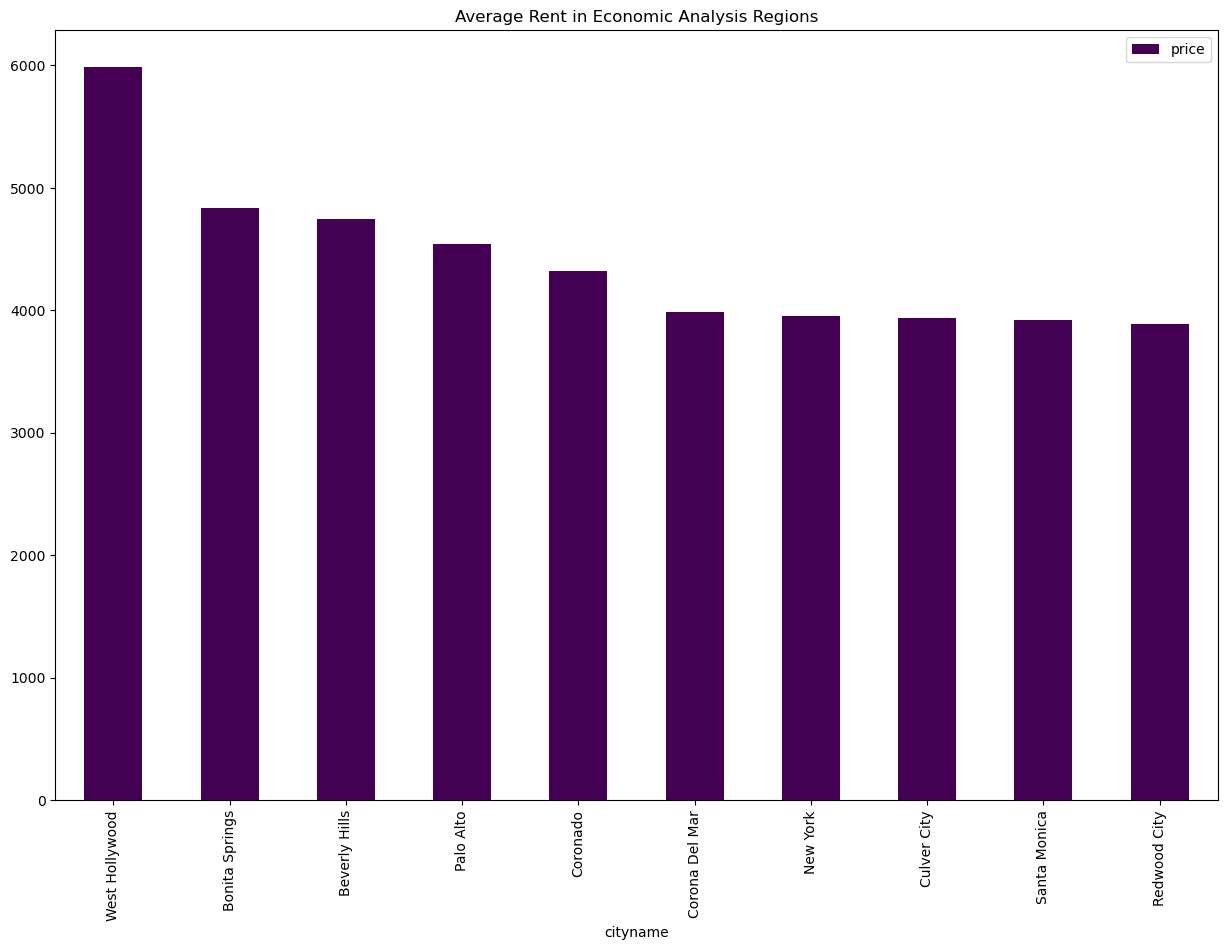

In [437]:
top_10 = df2[["cityname", "price"]].groupby(["cityname"]).mean()
top_10 = top_10.sort_values("price", ascending=False).nlargest(10, "price")
top_10
#data=df2.groupby('Economic_Analysis_Region')['price'].mean().sort_values(ascending=False).
top_10.plot(kind = 'bar', colormap='viridis', title='Average Rent in Economic Analysis Regions')

In [438]:
df2.bedrooms.value_counts()

2.0    46099
1.0    40331
3.0    10561
4.0     1498
0.0      662
5.0      286
6.0       47
7.0        4
8.0        3
9.0        1
Name: bedrooms, dtype: int64

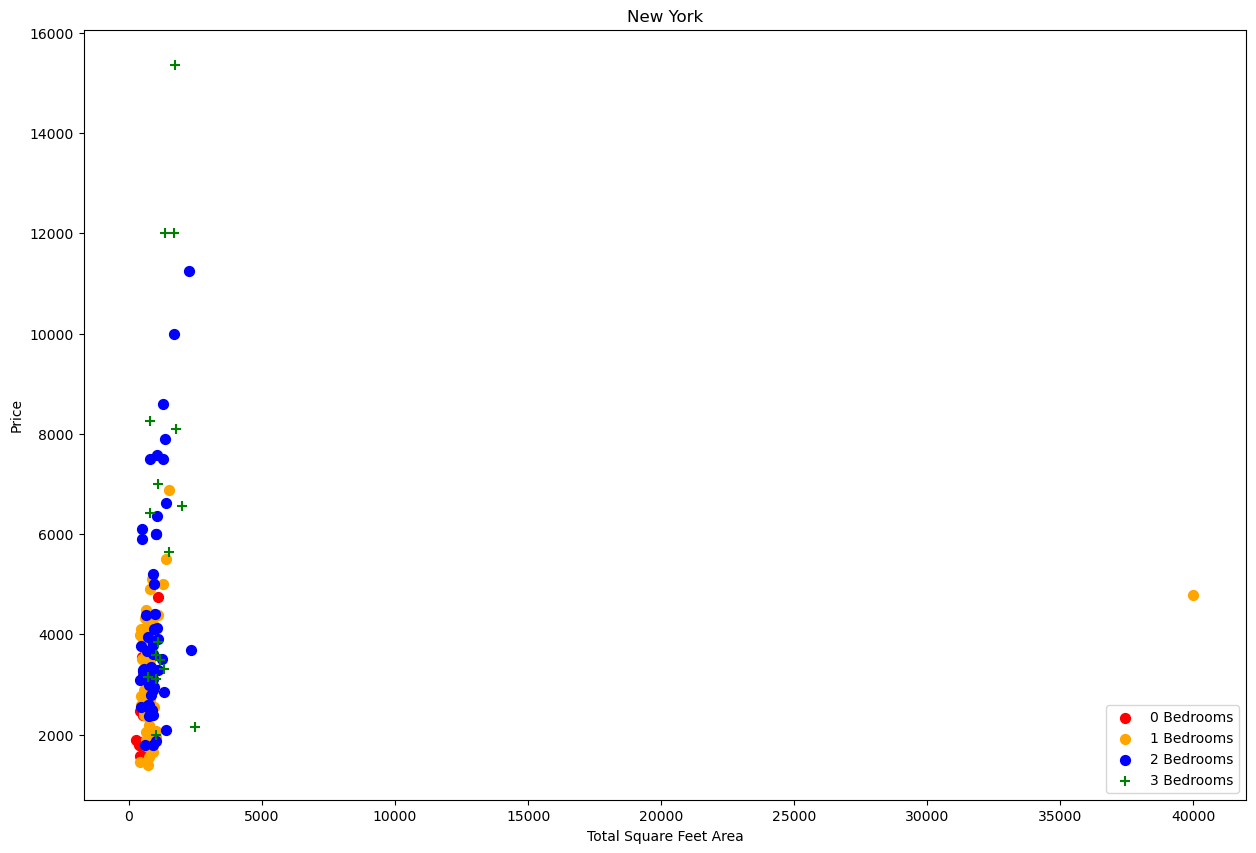

In [439]:
import matplotlib
def plot_scatter_chart(df,cityname):
    bedrooms_0 = df[(df.cityname==cityname) & (df.bedrooms==0)]
    bedrooms_1 = df[(df.cityname==cityname) & (df.bedrooms==1)]
    bedrooms_2 = df[(df.cityname==cityname) & (df.bedrooms==2)]
    bedrooms_3 = df[(df.cityname==cityname) & (df.bedrooms==3)]
   
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedrooms_0.square_feet, bedrooms_0.price,marker='o', color='red',label='0 Bedrooms', s=50)
    plt.scatter(bedrooms_1.square_feet, bedrooms_1.price,marker='o', color='orange',label='1 Bedrooms', s=50)
    plt.scatter(bedrooms_2.square_feet, bedrooms_2.price,color='blue',label='2 Bedrooms', s=50)
    plt.scatter(bedrooms_3.square_feet, bedrooms_3.price,marker='+', color='green',label='3 Bedrooms', s=50)
   
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(cityname)
    plt.legend(loc='lower right')
    
plot_scatter_chart(df2,"New York")

In [440]:
df[(df.cityname=='New York') & (df.bedrooms==1)][['price','square_feet','cityname','address']]

,price,square_feet,cityname,address
2243,3825.0,750,New York,400 East 55th St
7153,4790.0,40000,New York,NaN
50531,1400.0,700,New York,2722 East 26 St
51074,3500.0,750,New York,NaN
51355,3200.0,525,New York,NaN
51387,6871.0,1500,New York,NaN
51433,4995.0,1268,New York,NaN
51439,1800.0,650,New York,489 Columbus Avenue
51831,4100.0,450,New York,417 E 60th St
51905,2500.0,550,New York,543 E 5th St


In [441]:
df[(df.cityname=='New York') & (df.bedrooms==0)][['price','square_feet']]

,price,square_feet
50476,4736.0,1100
51266,2500.0,528
51708,2475.0,405
51782,3800.0,550
51786,3800.0,550
51834,3550.0,500
83278,1795.0,392
83294,1850.0,458
83313,1900.0,281
83424,2395.0,538


In [442]:
df2.astype({'bathrooms':'float','bedrooms':'float', 'price':'float','square_feet':'float'})

numerical_columns = ['bathrooms','bedrooms','price','square_feet']

In [443]:
#handling outliers


for k,v in df2[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df2[numerical_columns])[0]
    print("%s has outliers percentage of %.2f%%" % (k, perc))

   

bathrooms has outliers percentage of 0.41%
bedrooms has outliers percentage of 1.85%
price has outliers percentage of 4.73%
square_feet has outliers percentage of 2.86%


In [444]:
#descriptive_stats(df = df2, column = price)
df2.price.describe()

count    99492.000000
mean      1527.418003
std        911.094608
min          0.000000
25%       1013.000000
50%       1350.000000
75%       1795.000000
max      52500.000000
Name: price, dtype: float64

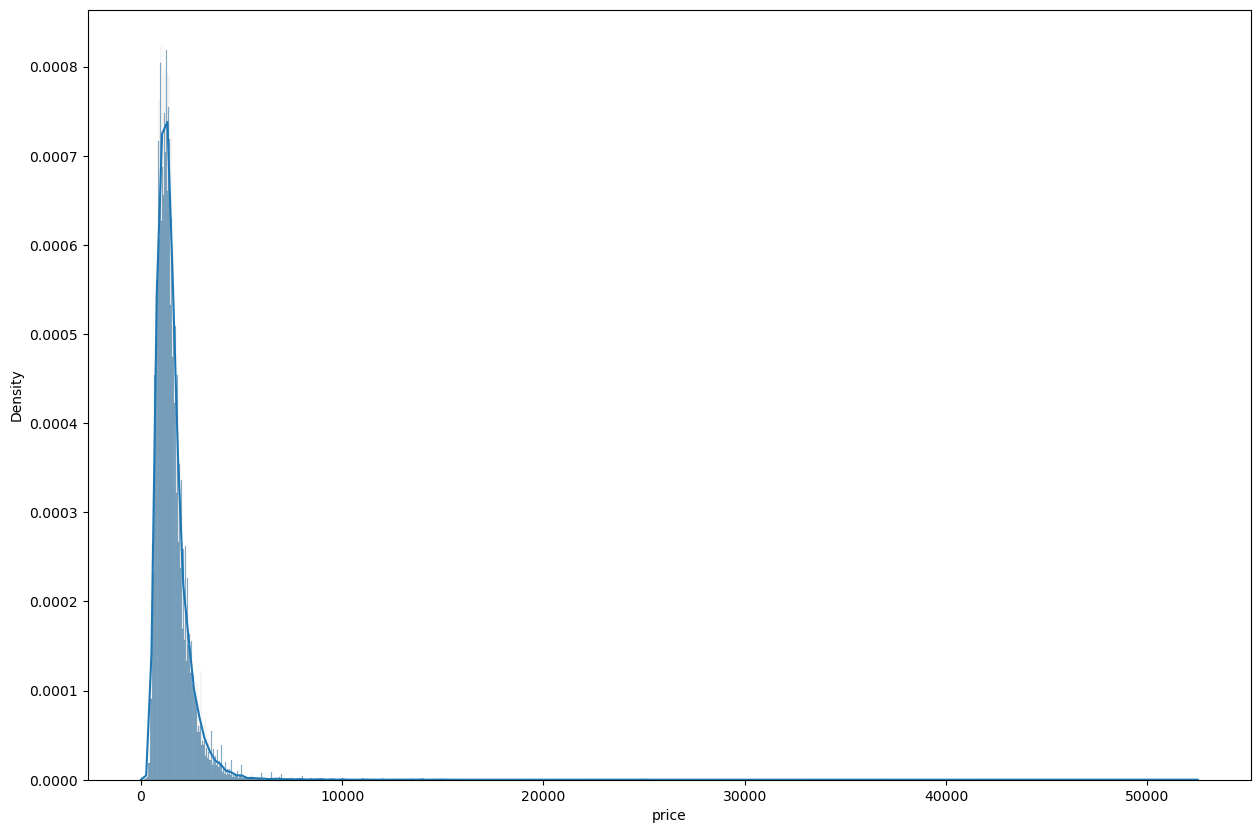

<Figure size 1500x1000 with 0 Axes>

In [445]:
sns.histplot(df2['price'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()

In [446]:
#Flooring and capping: flooring(i.e 25th percentile) for lower values and capping (i.e 75th percentile) for the higher values.
#These percentile values will be used for the quantile-based flooring and capping.


In [447]:
# Function to handle outliers in all numeric columns 

def floor_cap(df, column):    
    
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        whisker_width = 1.5
        lower_whisker = q1 - (whisker_width * iqr)
        upper_whisker = q3 + (whisker_width * iqr)
        print(lower_whisker)
        print(upper_whisker)
        df[column] = np.where(df[column] < lower_whisker, lower_whisker,df[column])

        df[column] = np.where(df[column] > upper_whisker, upper_whisker,df[column]) 
        return df[column]                



df2['price'] = floor_cap(df2, 'price')
df2['square_feet'] = floor_cap(df2, 'square_feet')

In [448]:
df2[df2.square_feet>1694]

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
11,apartment,3.0,2.0,3195.0,3077,other,MA,1.038349,New England
13,apartment,3.5,4.0,7800.0,4650,Scottsdale,AZ,1.677419,Southwest
38,apartment,2.0,5.0,4500.0,2050,Allston,MA,2.195122,New England
39,apartment,2.5,3.0,3990.0,1739,San Jose,CA,2.294422,Far West
42,apartment,3.0,4.0,4950.0,3350,other,CA,1.477612,Far West
51,apartment,2.0,4.0,3580.0,2100,Chicago,IL,1.704762,Great Lakes
80,apartment,3.0,3.0,3995.0,2831,Portland,OR,1.411162,Far West
84,apartment,2.0,3.0,1250.0,2628,Fort Smith,AR,0.475647,Southeast
87,apartment,2.5,5.0,3495.0,2900,Madison,WI,1.205172,Great Lakes
90,apartment,4.0,4.0,6500.0,3800,Annapolis,MD,1.710526,Mideast


-160.0
2968.0


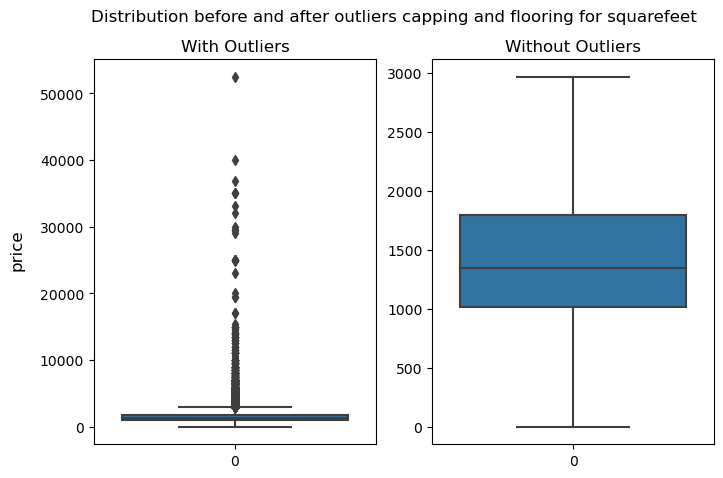

In [449]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,5))
fig.suptitle('Distribution before and after outliers capping and flooring for squarefeet')

axes[0].set_title('With Outliers')
axes[1].set_title('Without Outliers')
#sns.histplot(ax=axes[0], df2['price'], kde=True, bins='auto', stat = 'density');
sns.boxplot(ax=axes[0], data = df2['price'])
#plt.ylabel("square feet")
#Handling Outliers with floor_cap function:
floor_cap(df2, 'price')
sns.boxplot(ax=axes[1], data = df2['price'])

fig.supylabel('price')
plt.savefig('price_outlier.jpg')

150.0
1694.0


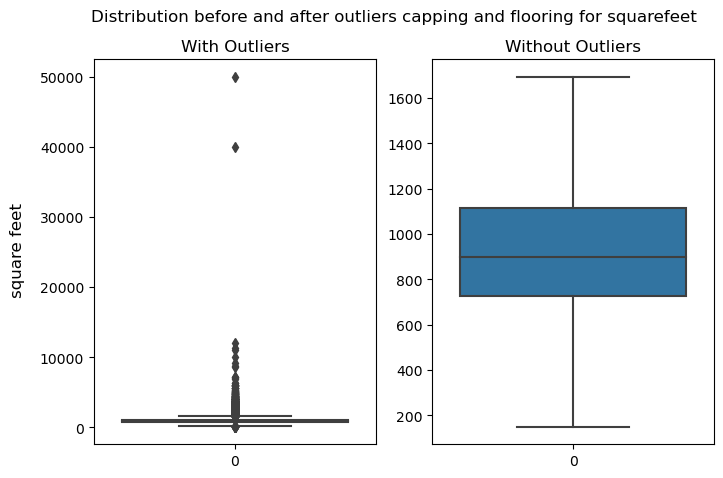

In [450]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,5))
fig.suptitle('Distribution before and after outliers capping and flooring for squarefeet')

axes[0].set_title('With Outliers')
axes[1].set_title('Without Outliers')
#sns.histplot(ax=axes[0], df2['price'], kde=True, bins='auto', stat = 'density');
sns.boxplot(ax=axes[0], data = df2['square_feet'])
#plt.ylabel("square feet")
#Handling Outliers with floor_cap function:
floor_cap(df2, 'square_feet')
sns.boxplot(ax=axes[1], data = df2['square_feet'])

fig.supylabel('square feet')
plt.savefig('squarefeet_outlier.jpg')

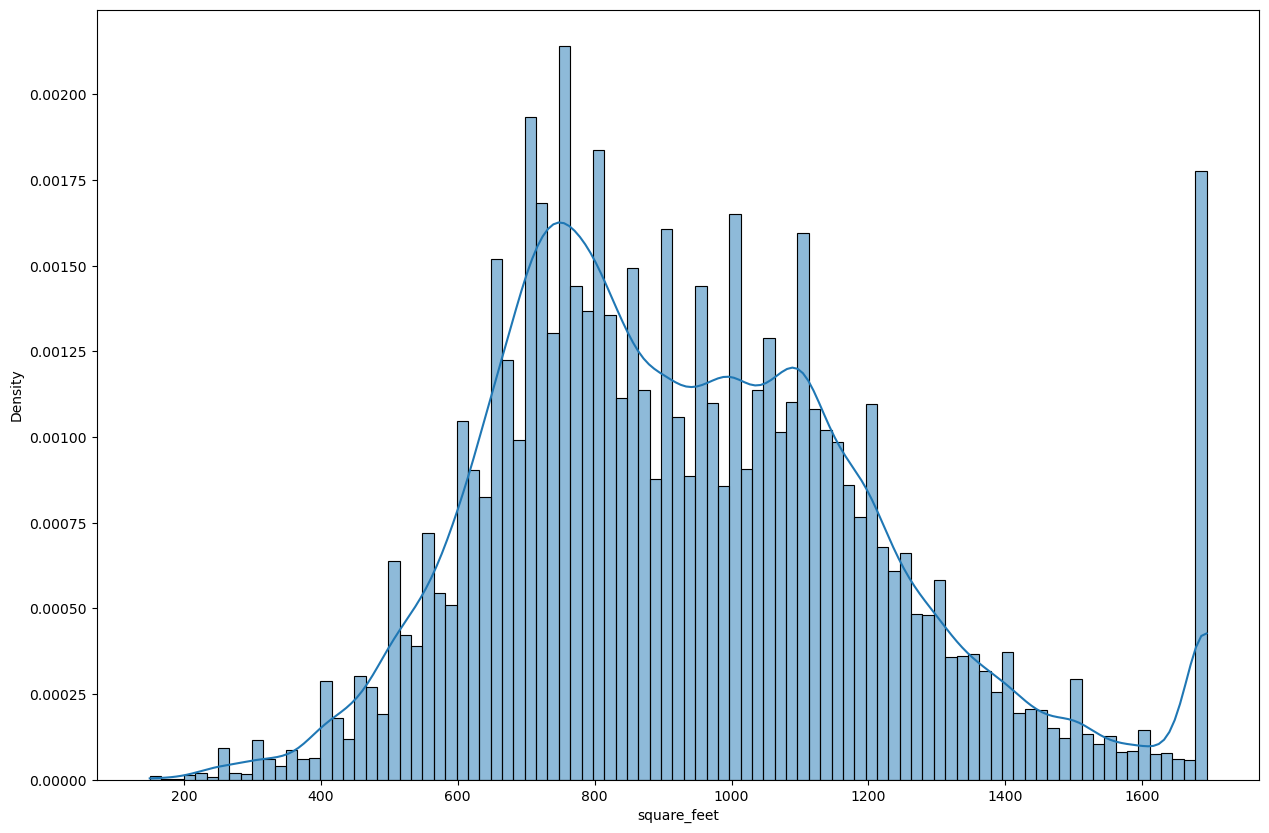

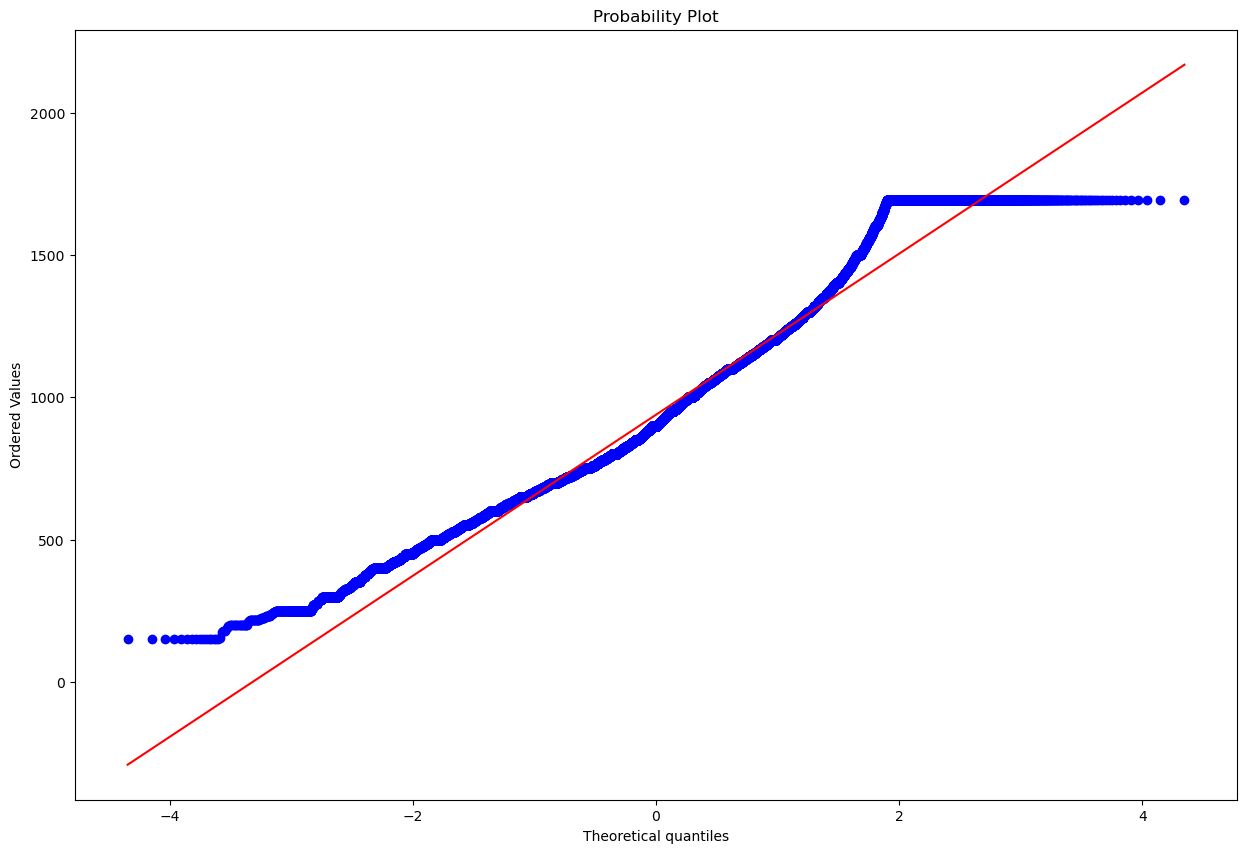

In [451]:
sns.histplot(df2['square_feet'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(df2['square_feet'], plot=plt)

In [452]:
print("Skewness: %f" % df2['square_feet'].skew())
print("Skewness: %f" % df2['price'].skew())

Skewness: 0.555987
Skewness: 0.854028


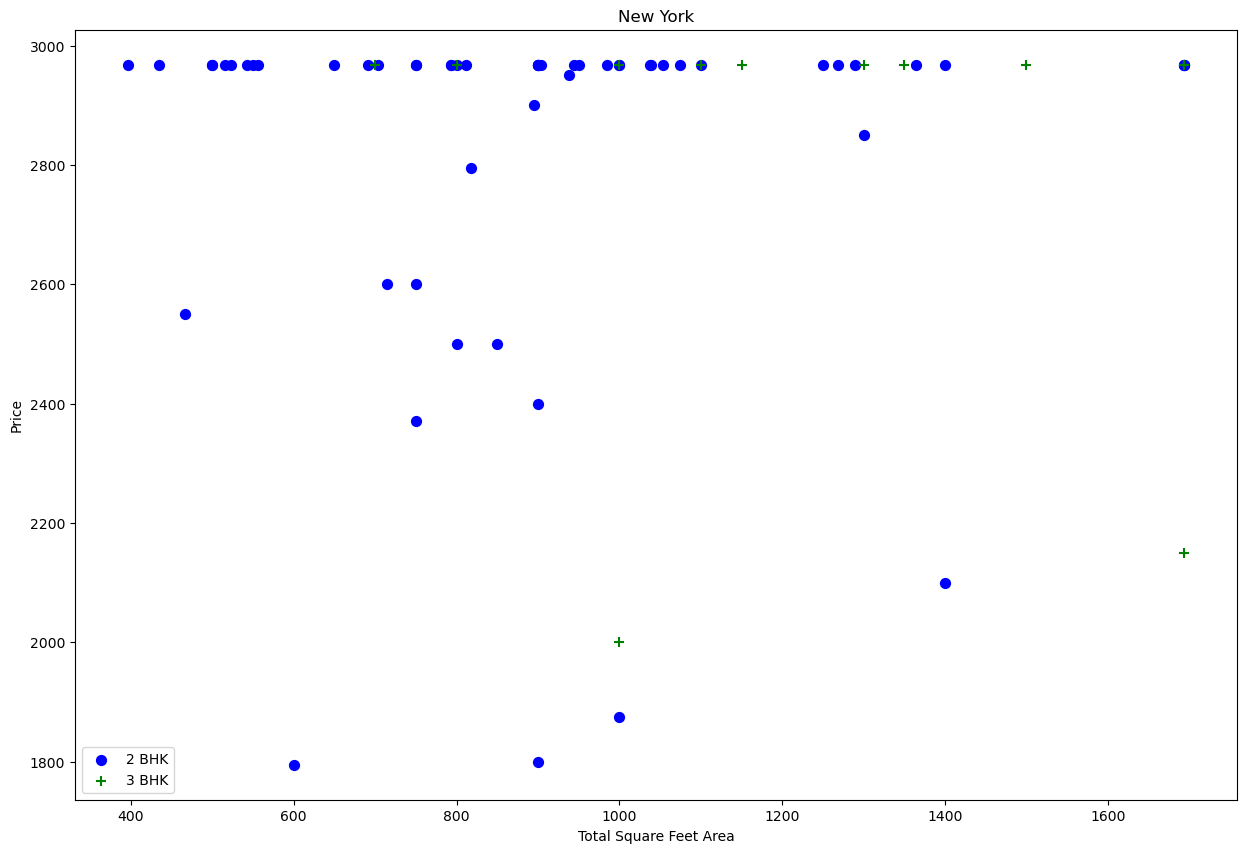

In [453]:
import matplotlib
def plot_scatter_chart(df,cityname):
    bd2 = df[(df.cityname==cityname) & (df.bedrooms==2)]
    bd3 = df[(df.cityname==cityname) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bd2.square_feet,bd2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bd3.square_feet,bd3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(cityname)
    plt.legend()
    
plot_scatter_chart(df2,"New York")

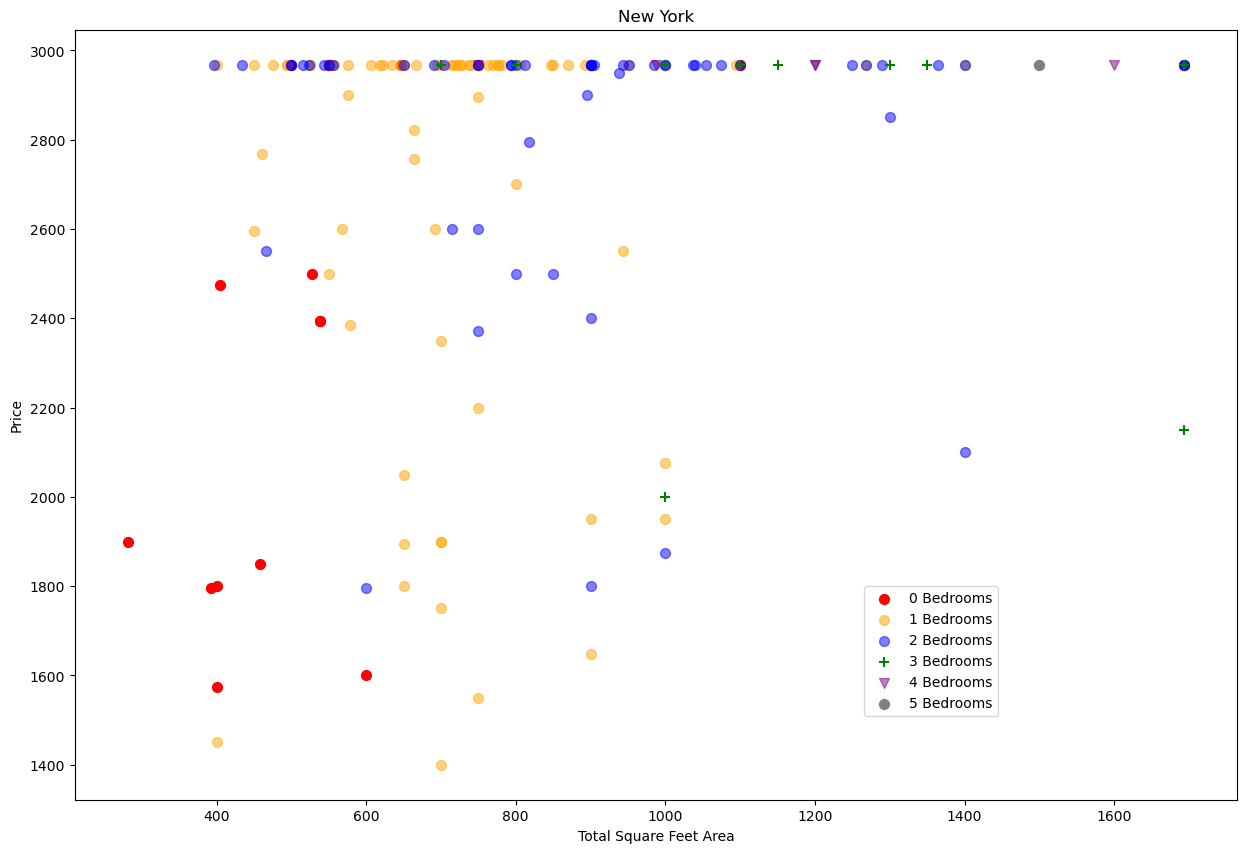

In [454]:
import matplotlib
def plot_scatter_chart(df,cityname):
    bedrooms_0 = df[(df.cityname==cityname) & (df.bedrooms==0)]
    bedrooms_1 = df[(df.cityname==cityname) & (df.bedrooms==1)]
    bedrooms_2 = df[(df.cityname==cityname) & (df.bedrooms==2)]
    bedrooms_3 = df[(df.cityname==cityname) & (df.bedrooms==3)]
    bedrooms_4 = df[(df.cityname==cityname) & (df.bedrooms==4)]
    bedrooms_5 = df[(df.cityname==cityname) & (df.bedrooms==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedrooms_0.square_feet, bedrooms_0.price,marker='o', color='red',label='0 Bedrooms', s=50)
    plt.scatter(bedrooms_1.square_feet, bedrooms_1.price,marker='o', color='orange',label='1 Bedrooms', s=50, alpha=0.5, )
    plt.scatter(bedrooms_2.square_feet, bedrooms_2.price,color='blue',label='2 Bedrooms', s=50, alpha=0.5)
    plt.scatter(bedrooms_3.square_feet, bedrooms_3.price,marker='+', color='green',label='3 Bedrooms', s=50)
    plt.scatter(bedrooms_4.square_feet, bedrooms_4.price,marker='v', color='purple',label='4 Bedrooms', s=50, alpha=0.5)
    plt.scatter(bedrooms_5.square_feet, bedrooms_5.price,marker='o', color='grey',label='5 Bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(cityname)
    plt.legend(bbox_to_anchor=(0.8, 0.1),loc='lower right')
    plt.savefig(f'{cityname}.jpg')
plot_scatter_chart(df2,"New York")

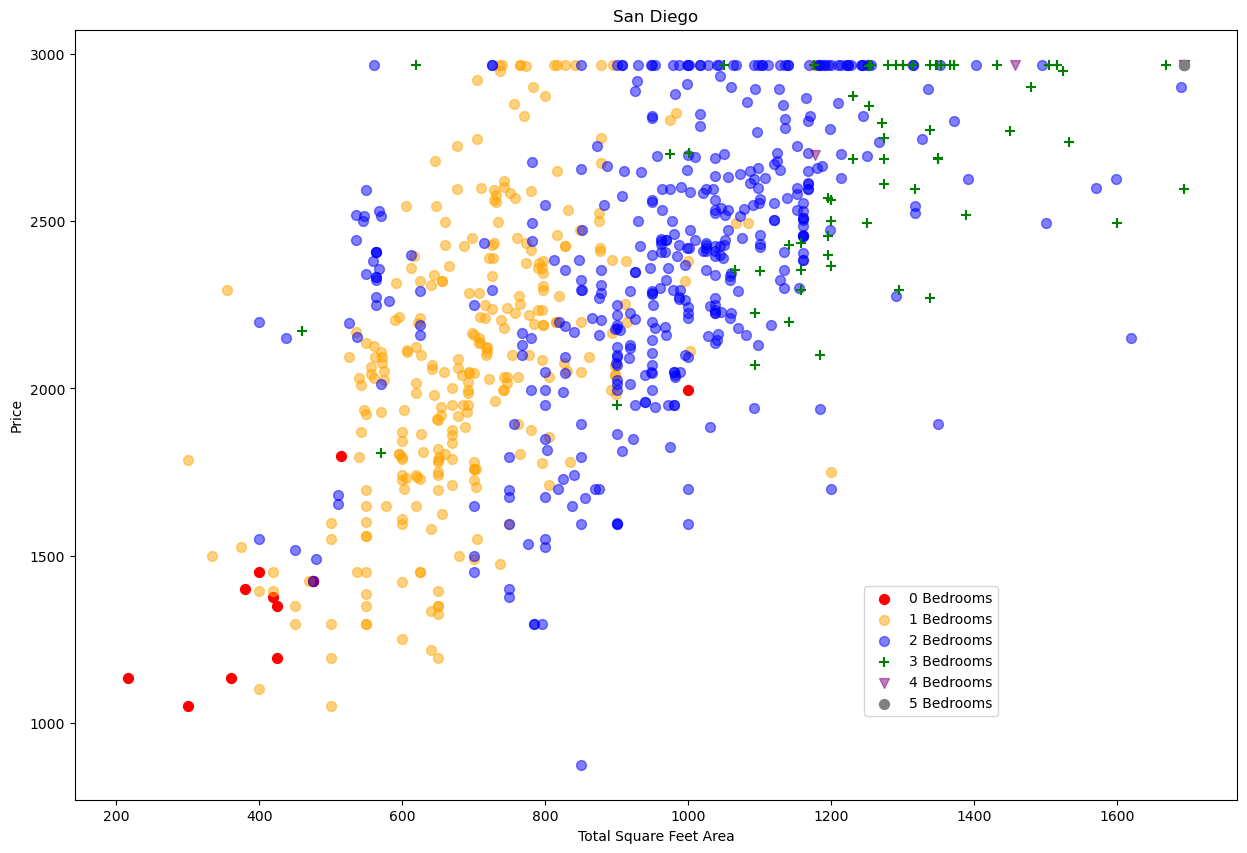

In [385]:
plot_scatter_chart(df2,"San Diego")

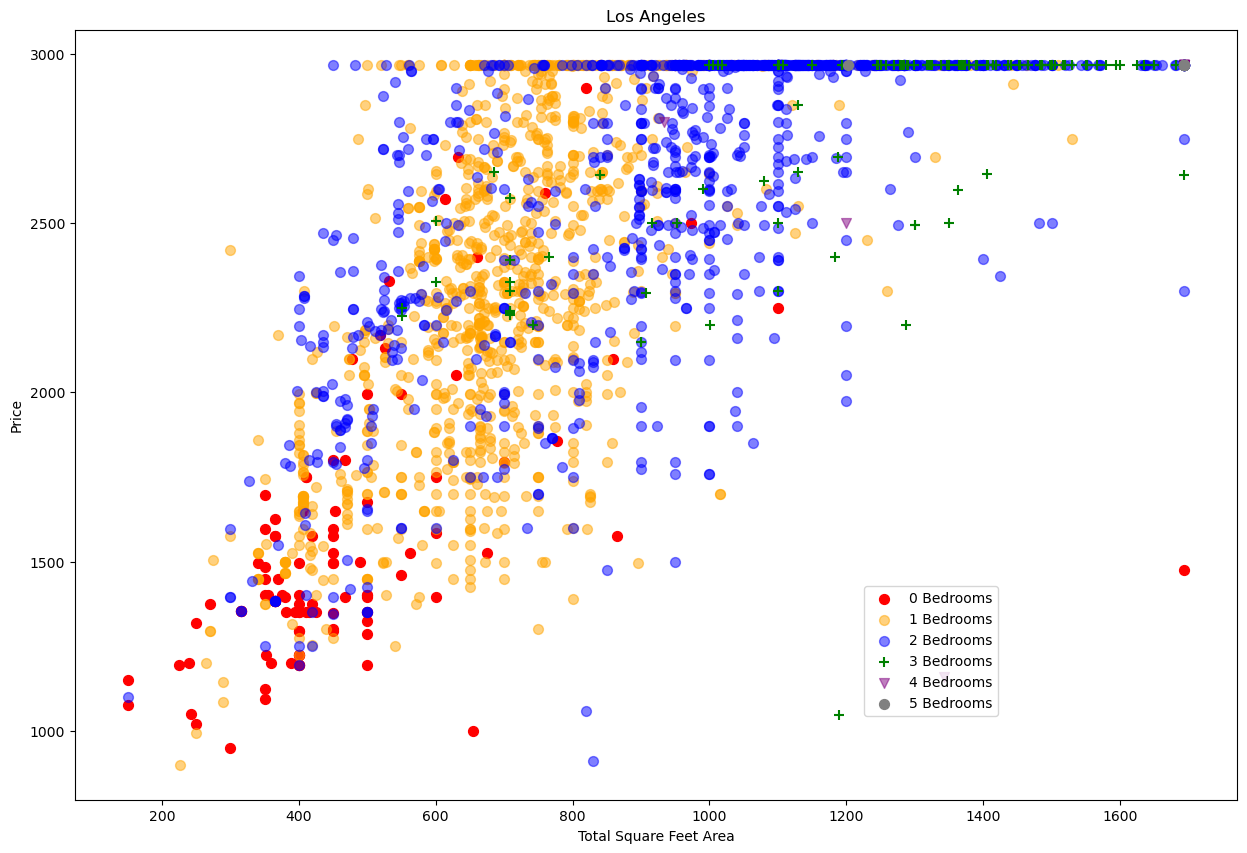

In [386]:
plot_scatter_chart(df2,"Los Angeles")

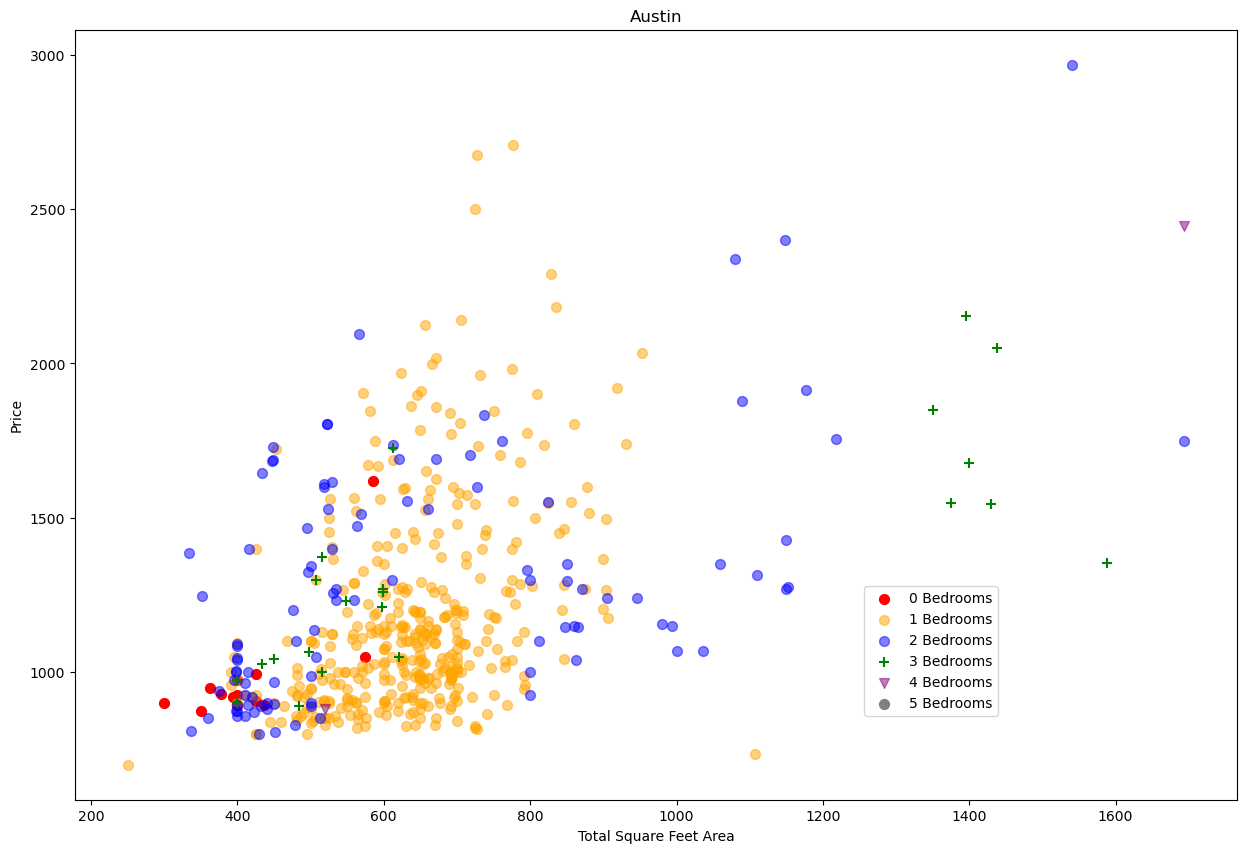

In [387]:
plot_scatter_chart(df2,"Austin")

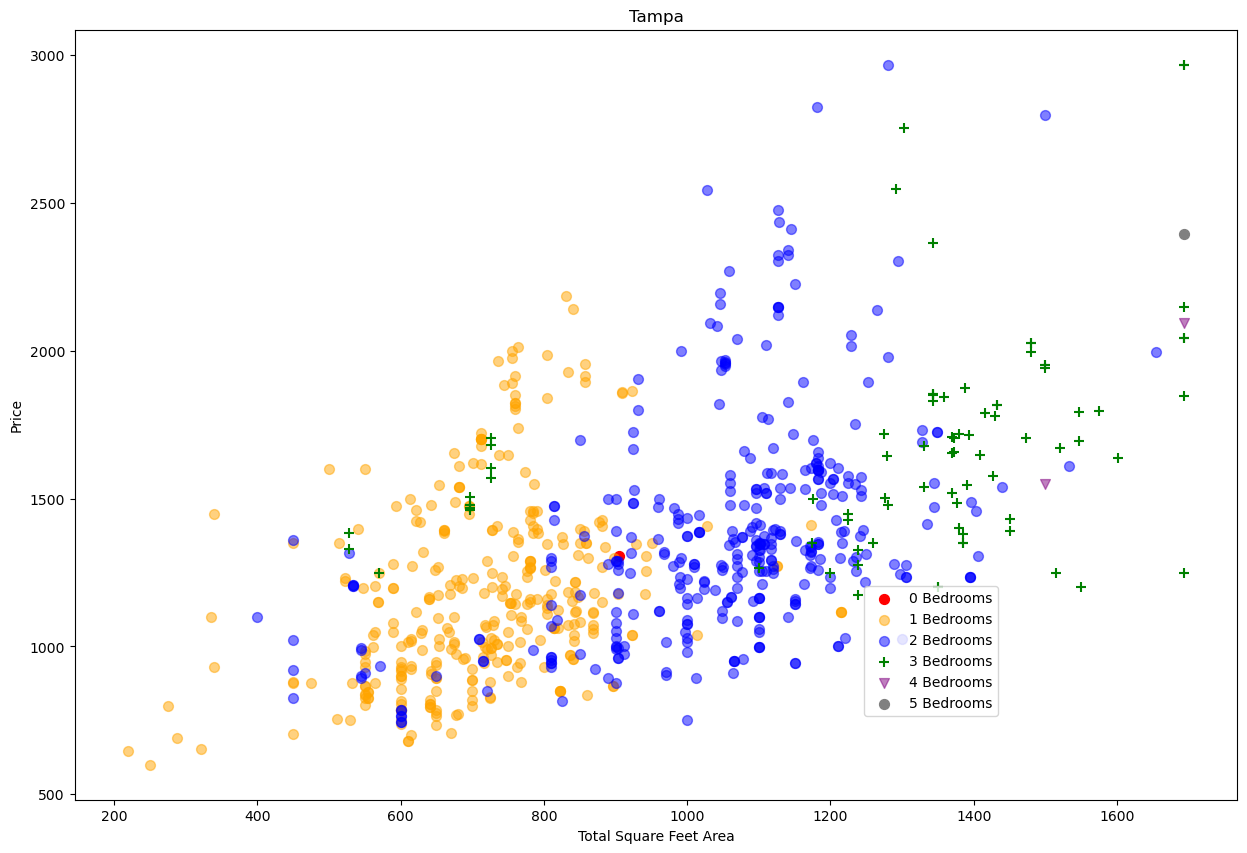

In [390]:
plot_scatter_chart(df2,"Tampa")

Text(0, 0.5, 'Count')

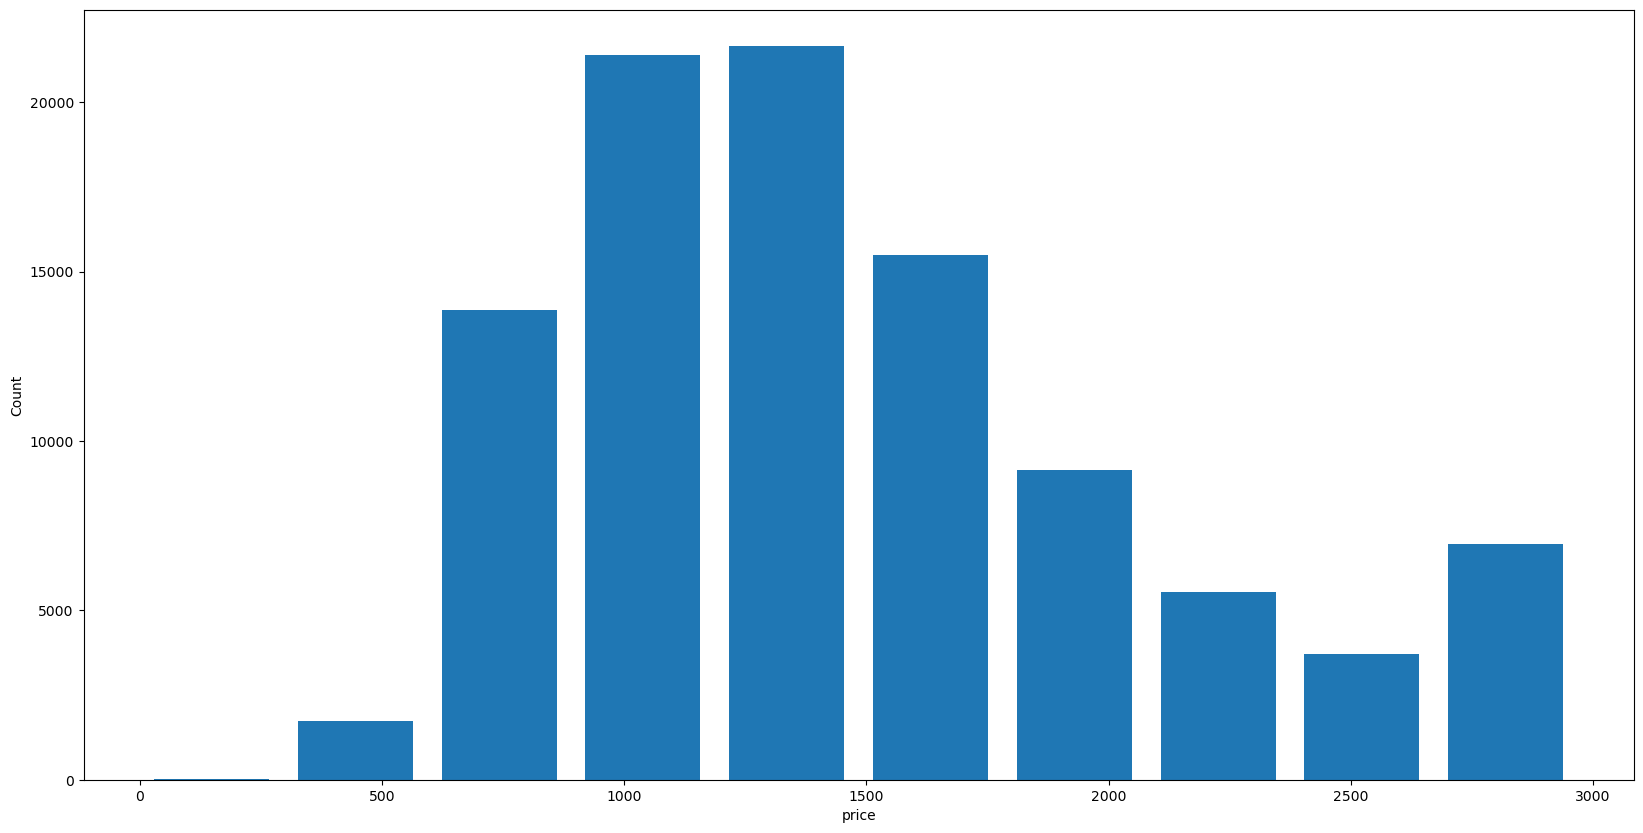

In [389]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price,rwidth=0.8)
plt.xlabel("price")
plt.ylabel("Count")

-0.20153794727968166
3.323173932489037


Text(0, 0.5, 'Count')

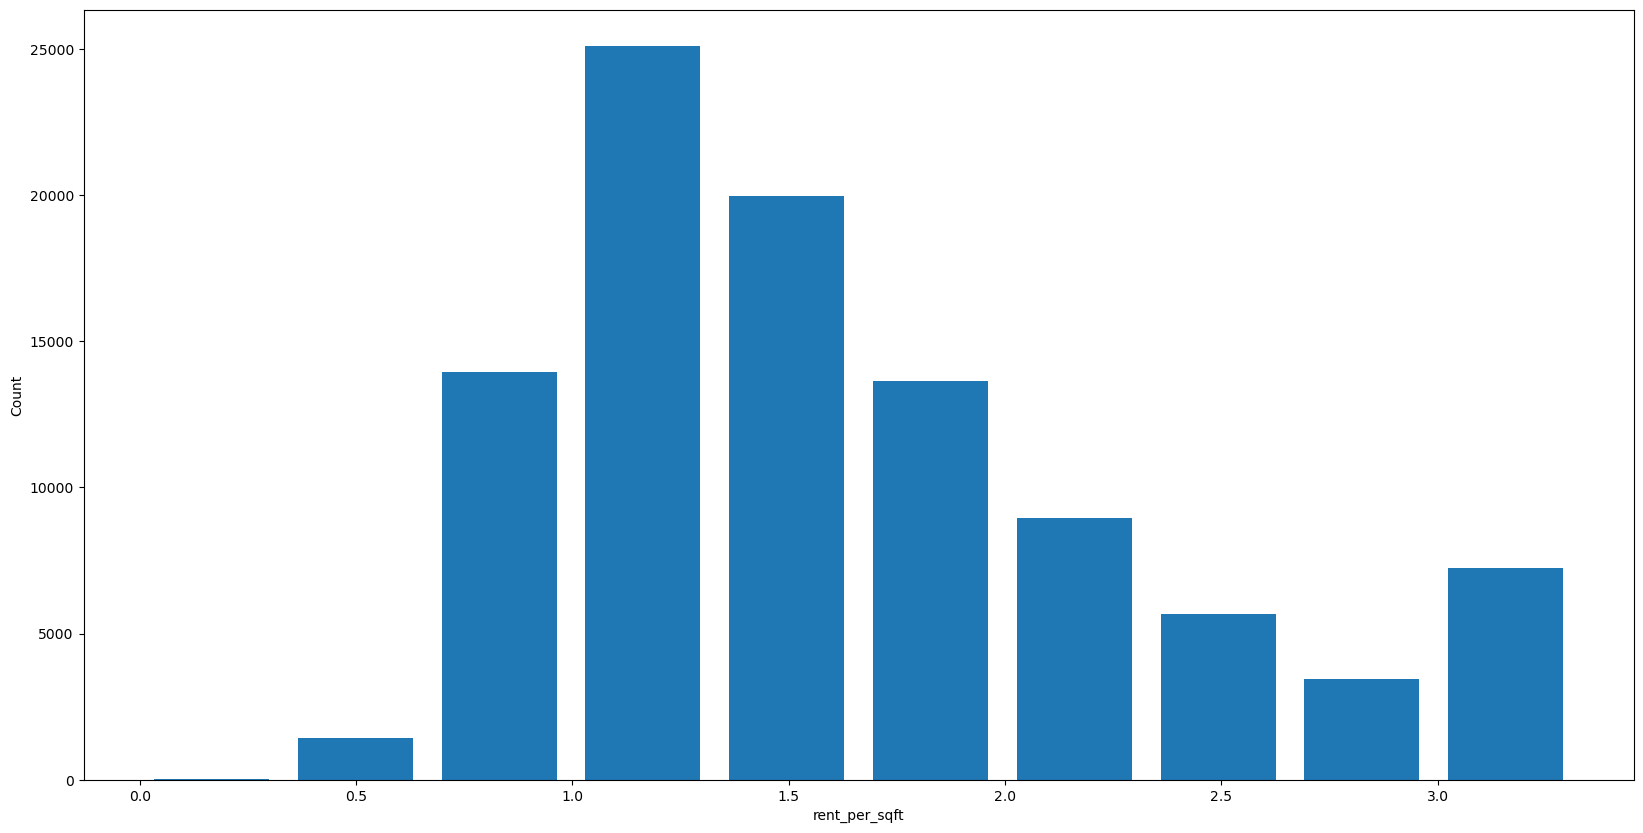

In [379]:
floor_cap(df2, 'rent_per_sqft')

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.rent_per_sqft,rwidth=0.8)
plt.xlabel("rent_per_sqft")
plt.ylabel("Count")

In [170]:
df2.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
0,apartment,1.0,1.0,2195.0,542.0,Redondo Beach,CA,3.323174,Far West
1,apartment,1.5,3.0,1250.0,1500.0,Newport News,VA,0.833333,Southeast
2,apartment,2.0,3.0,1395.0,1650.0,Raleigh,NC,0.845455,Southeast
3,apartment,1.0,2.0,1600.0,820.0,Vacaville,CA,1.951220,Far West
4,apartment,1.0,1.0,975.0,624.0,Albuquerque,NM,1.562500,Southwest


In [171]:
df2.bathrooms.unique()
df2[df2.bathrooms==3.5]

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
13,apartment,3.5,4.0,2968.0,1694.0,Scottsdale,AZ,1.677419,Southwest
147,apartment,3.5,5.0,2350.0,1694.0,other,CO,0.839286,Rocky Mountain
152,apartment,3.5,4.0,2968.0,1694.0,other,HI,3.252966,Far West
277,apartment,3.5,3.0,2800.0,1694.0,Jacksonville,FL,1.254480,Southeast
384,apartment,3.5,5.0,2395.0,1694.0,Houston,TX,0.519072,Southwest
473,apartment,3.5,3.0,2050.0,1694.0,other,TX,1.205882,Southwest
531,apartment,3.5,3.0,1900.0,1694.0,Houston,TX,0.994244,Southwest
711,apartment,3.5,3.0,2900.0,1694.0,other,AR,0.657895,Southeast
971,apartment,3.5,4.0,2950.0,1694.0,Lenexa,KS,0.723926,Plains
1205,apartment,3.5,4.0,2850.0,1694.0,Temecula,CA,0.928036,Far West


In [172]:
df2.bedrooms.unique()
df2[df2.bathrooms>7]

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
3487,apartment,8.0,6.0,2968.0,1694.0,other,CA,2.868288,Far West
3907,apartment,8.5,6.0,2968.0,1694.0,other,MD,0.971903,Mideast
38473,apartment,9.0,6.0,2968.0,1694.0,Los Angeles,CA,3.323174,Far West
40715,apartment,7.5,6.0,2968.0,1694.0,West Hollywood,CA,3.323174,Far West
40932,apartment,8.0,6.0,2968.0,1694.0,Los Angeles,CA,3.323174,Far West


In [173]:
df2.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
0,apartment,1.0,1.0,2195.0,542.0,Redondo Beach,CA,3.323174,Far West
1,apartment,1.5,3.0,1250.0,1500.0,Newport News,VA,0.833333,Southeast
2,apartment,2.0,3.0,1395.0,1650.0,Raleigh,NC,0.845455,Southeast
3,apartment,1.0,2.0,1600.0,820.0,Vacaville,CA,1.951220,Far West
4,apartment,1.0,1.0,975.0,624.0,Albuquerque,NM,1.562500,Southwest


Text(0, 0.5, 'Count')

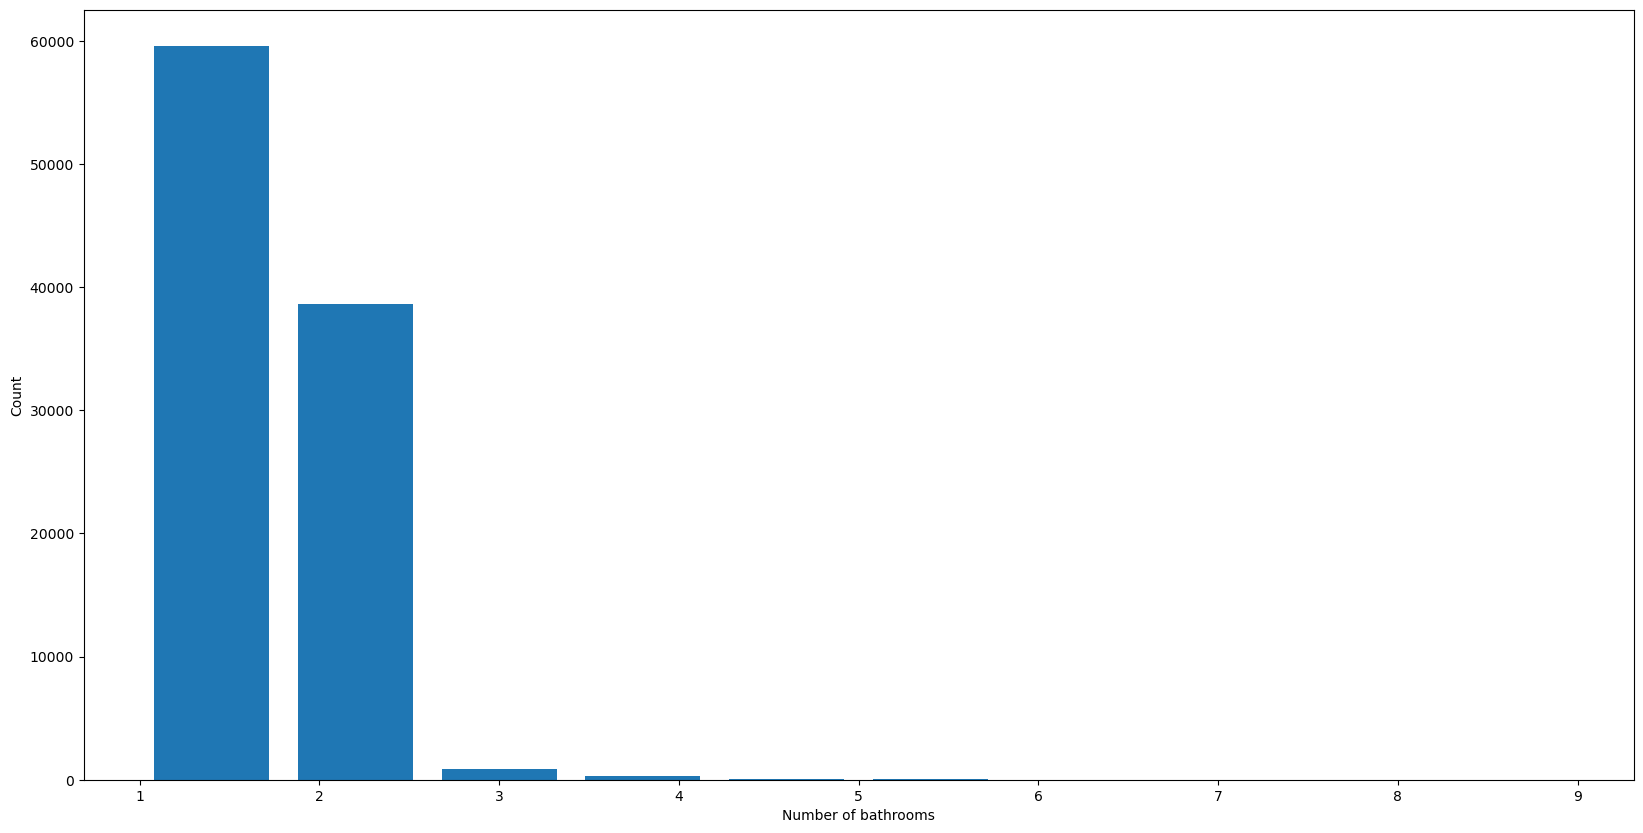

In [174]:
plt.hist(df2.bathrooms, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

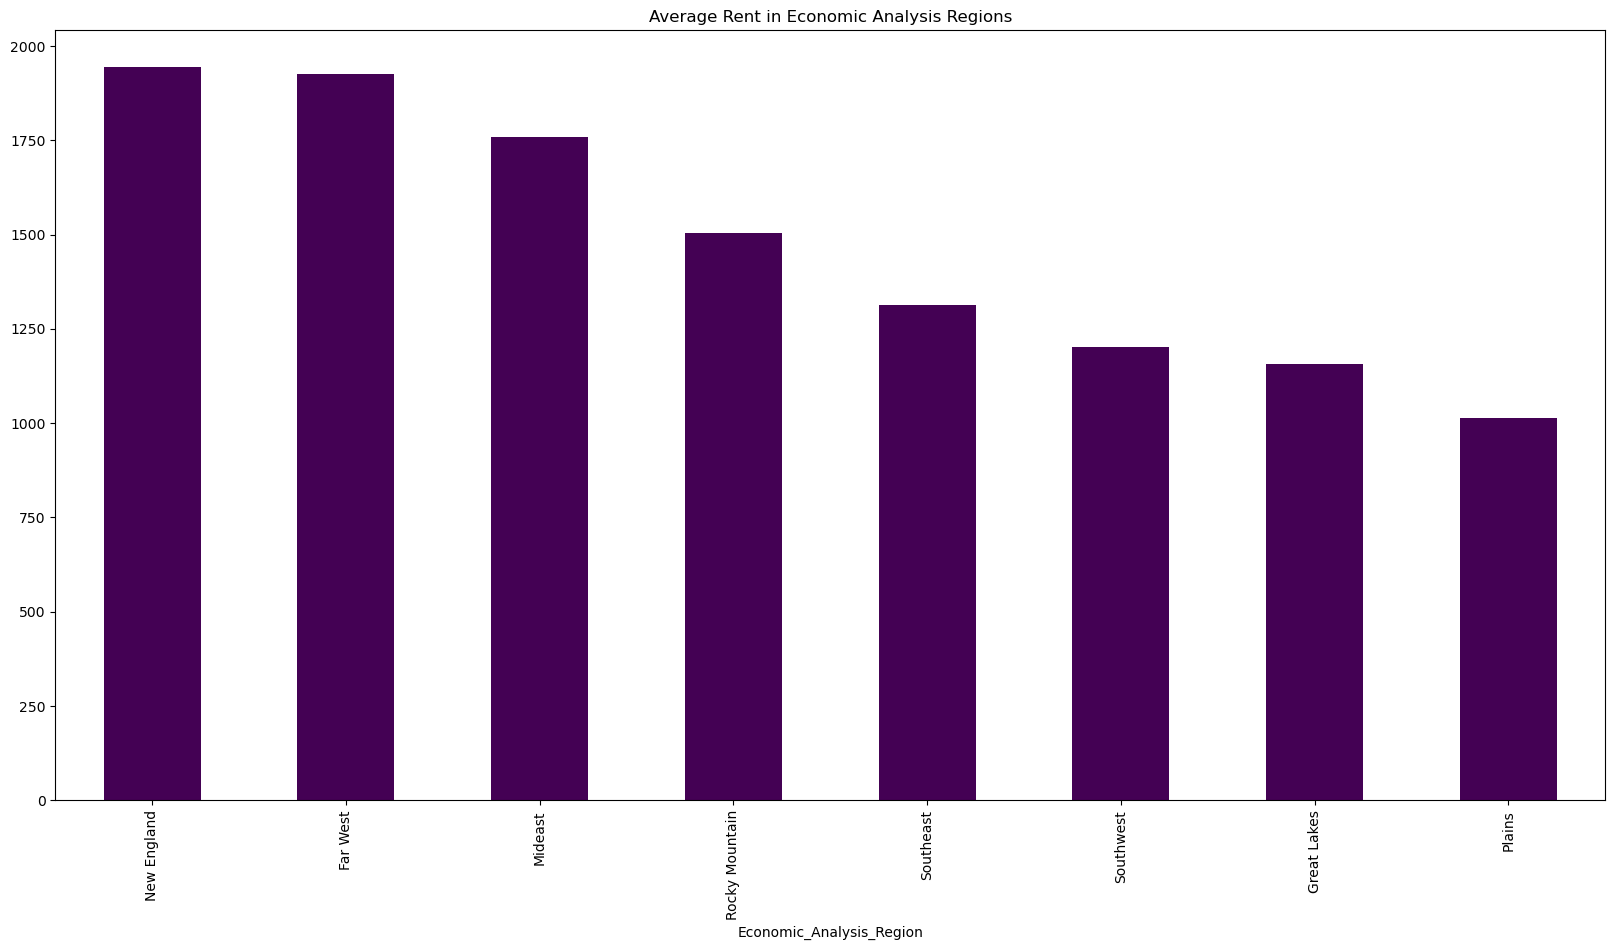

In [175]:
data=df2.groupby('Economic_Analysis_Region')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', colormap='viridis', title='Average Rent in Economic Analysis Regions')
#plot = data.plot(kind='bar', title="My plot")




In [176]:
df2[(df2.cityname=='New York') & (df2.bedrooms==1)][['price','square_feet']]

,price,square_feet
2243,2968.0,750.0
7153,2968.0,1694.0
50531,1400.0,700.0
51074,2968.0,750.0
51355,2968.0,525.0
51387,2968.0,1500.0
51433,2968.0,1268.0
51439,1800.0,650.0
51831,2968.0,450.0
51905,2500.0,550.0


In [177]:
avail = df2[['cityname','category']].groupby('cityname').count().sort_values('category',ascending = False)
data = avail[1:10]

Text(0.5, 1.0, 'Top Cites with maximum nos of houses available')

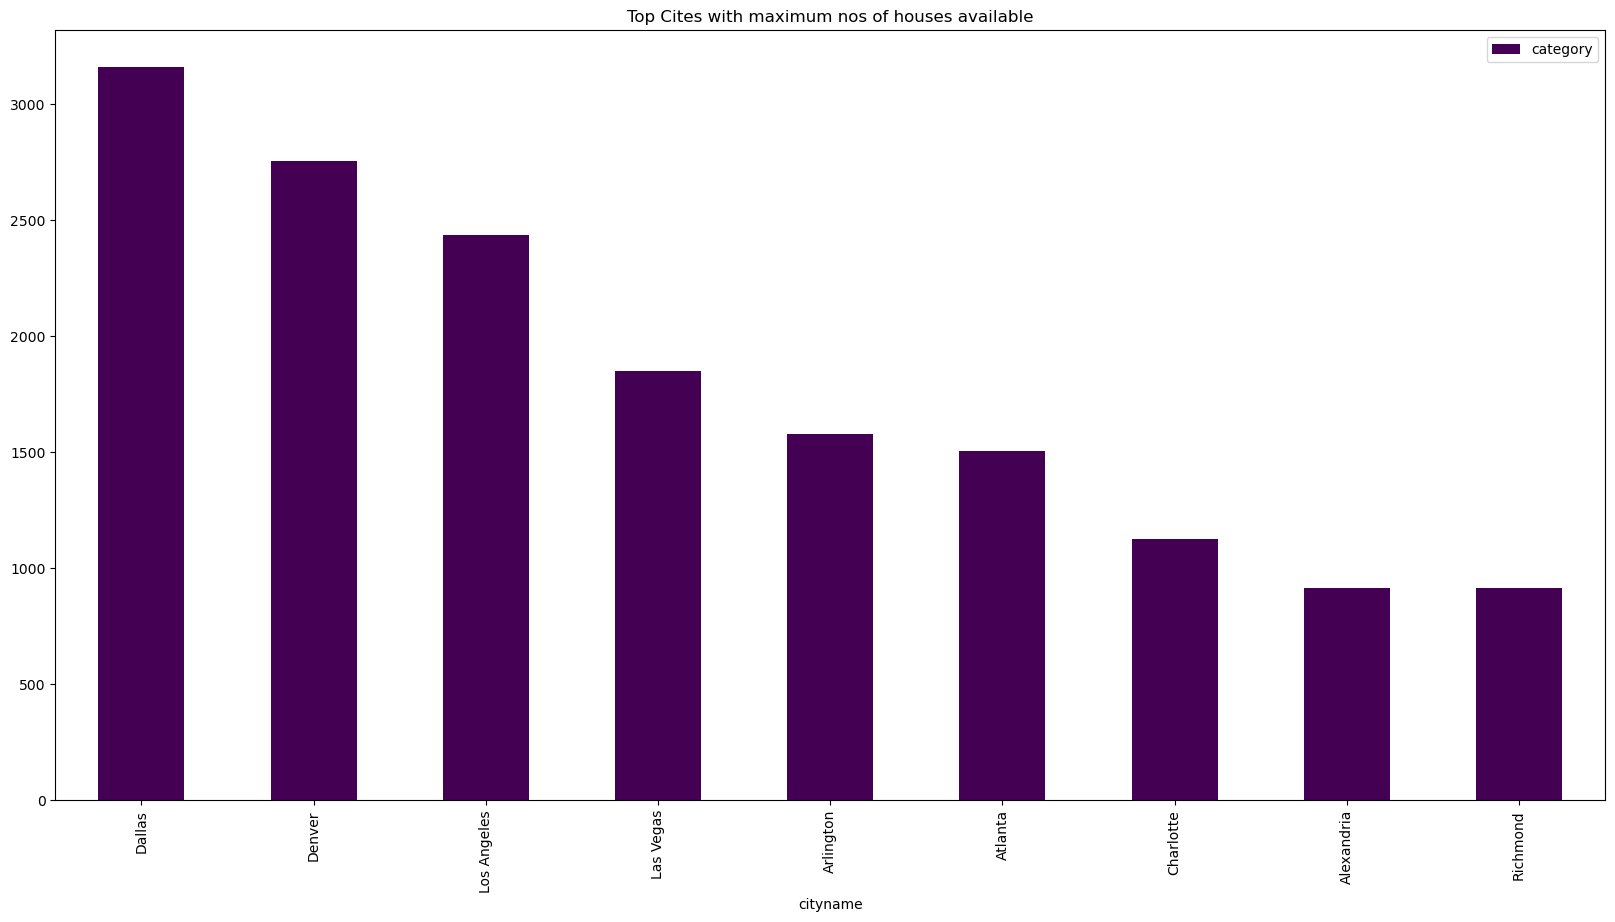

In [178]:

data.plot(kind = 'bar', colormap = 'viridis')
plt.title("Top Cites with maximum nos of houses available")
#plt.ylable('Count')

In [179]:
data = df2[(df.cityname == 'New York') & (df.bedrooms <= 4)]
data.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
2243,apartment,1.0,1.0,2968.0,750.0,New York,NY,3.323174,Mideast
7153,apartment,1.0,1.0,2968.0,1694.0,New York,NY,0.119750,Mideast
7161,apartment,1.0,2.0,2968.0,704.0,New York,NY,3.323174,Mideast
50476,apartment,1.0,0.0,2968.0,1100.0,New York,NY,3.323174,Mideast
50531,apartment,1.0,1.0,1400.0,700.0,New York,NY,2.000000,Mideast


avail = df2[['cityname','category', 'bedrooms', 'price']].groupby('cityname','bedrooms').count().sort_values('category',ascending = False)
avail = avail[1:10]
avial

In [180]:
data = df2[df.bedrooms<=4]

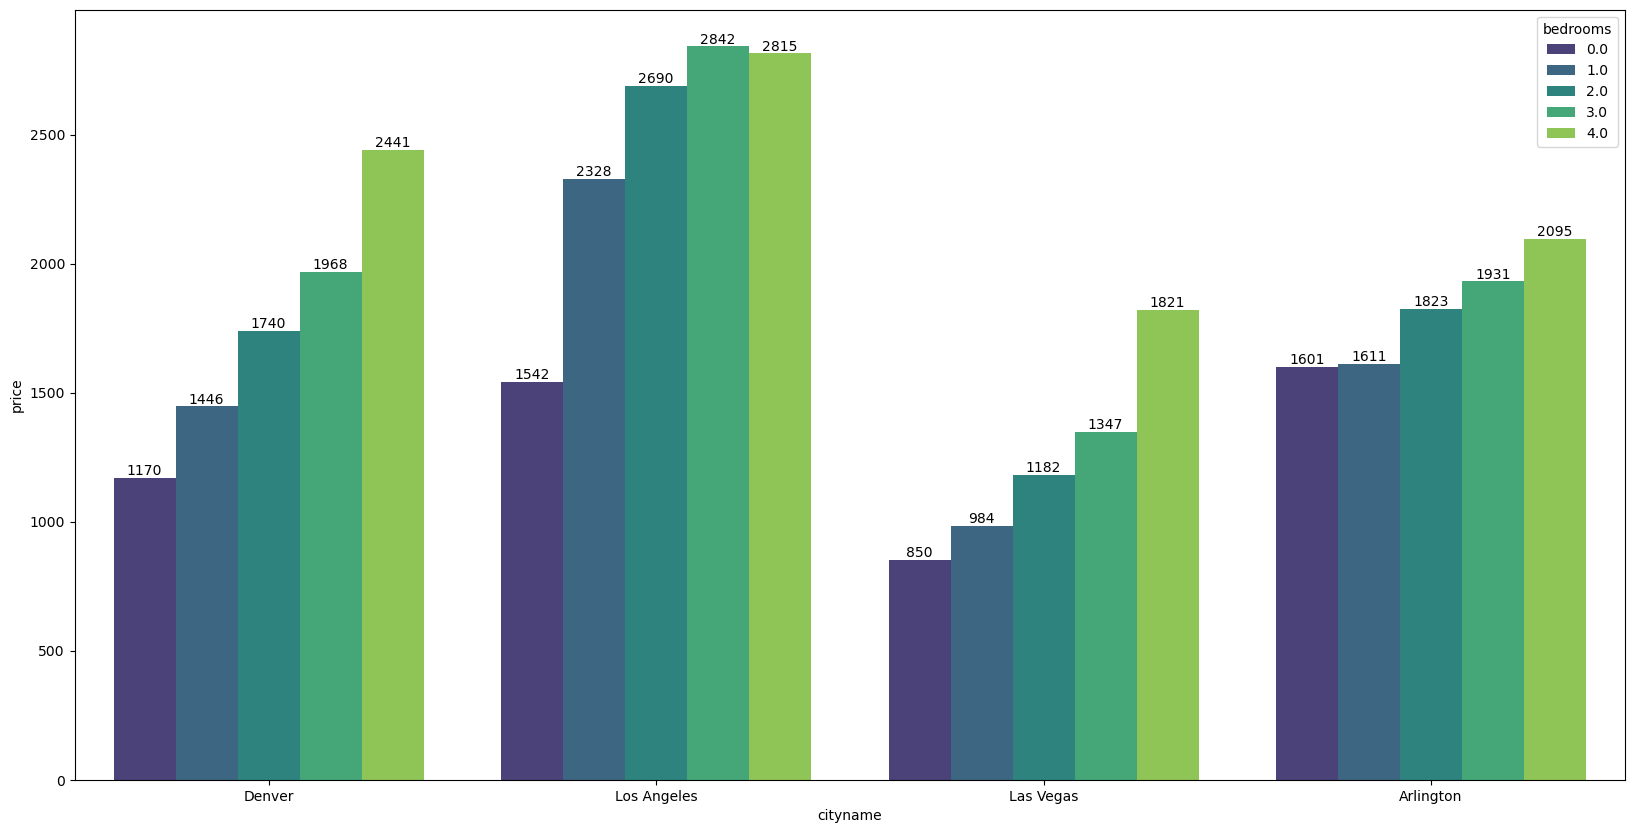

In [181]:
plt.figure(figsize=(20, 10))
#sns.barplot(x=avail.index, y=avail['price'],hue =avail['bedrooms'], palette='viridis',errorbar=None)
ax = sns.barplot(x = data['cityname'], y = data['price'], hue = data['bedrooms'], palette = 'viridis', errorbar = None, order=df.cityname.value_counts().iloc[1:5].index)
#ax.bar_label(ax.containers)
for container in ax.containers:
    ax.bar_label(container, fmt = '%d')

In [182]:
df2.head()

,category,bathrooms,bedrooms,price,square_feet,cityname,state,rent_per_sqft,Economic_Analysis_Region
0,apartment,1.0,1.0,2195.0,542.0,Redondo Beach,CA,3.323174,Far West
1,apartment,1.5,3.0,1250.0,1500.0,Newport News,VA,0.833333,Southeast
2,apartment,2.0,3.0,1395.0,1650.0,Raleigh,NC,0.845455,Southeast
3,apartment,1.0,2.0,1600.0,820.0,Vacaville,CA,1.951220,Far West
4,apartment,1.0,1.0,975.0,624.0,Albuquerque,NM,1.562500,Southwest


In [183]:
#df1 = df.drop(['id','title','amenities','body','currency','has_photo','latitude','longitude','price_display','price_type','fee','address','source','time','pets_allowed'],axis='columns')
df_final = df2.drop(['category','state','rent_per_sqft'], axis = 'columns')

In [184]:
df_final.head()

,bathrooms,bedrooms,price,square_feet,cityname,Economic_Analysis_Region
0,1.0,1.0,2195.0,542.0,Redondo Beach,Far West
1,1.5,3.0,1250.0,1500.0,Newport News,Southeast
2,2.0,3.0,1395.0,1650.0,Raleigh,Southeast
3,1.0,2.0,1600.0,820.0,Vacaville,Far West
4,1.0,1.0,975.0,624.0,Albuquerque,Southwest


In [185]:
#One Hot Encoding :Using Pandas get_dummies method 
dummies = pd.get_dummies(df_final.cityname)
dummies.head(100)

,Aberdeen,Abingdon,Abington,Absecon,Acton,Addison,Akron,Albuquerque,Alexandria,Alhambra,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [186]:
df_4 = pd.concat([df_final,dummies.drop('other',axis = 'columns')], axis = 'columns')
df_4.head()

,bathrooms,bedrooms,price,square_feet,cityname,Economic_Analysis_Region,Aberdeen,Abingdon,Abington,Absecon,...,Yonkers,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills
0,1.0,1.0,2195.0,542.0,Redondo Beach,Far West,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500.0,Newport News,Southeast,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650.0,Raleigh,Southeast,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,1600.0,820.0,Vacaville,Far West,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,975.0,624.0,Albuquerque,Southwest,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df_4 = df_4.drop('cityname', axis='columns')
df_4.head()

,bathrooms,bedrooms,price,square_feet,Economic_Analysis_Region,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Yonkers,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills
0,1.0,1.0,2195.0,542.0,Far West,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500.0,Southeast,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650.0,Southeast,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,1600.0,820.0,Far West,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,975.0,624.0,Southwest,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
dummies1 = pd.get_dummies(df_final.Economic_Analysis_Region)
dummies1.head(10)

,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0


In [189]:
df_4 = pd.concat([df_4,dummies1.drop("Plains",axis = 'columns')], axis = 'columns')

In [209]:
df_4.head()

,bathrooms,bedrooms,price,square_feet,Aberdeen,Abingdon,Abington,Absecon,Acton,Addison,...,Zachary,Zebulon,Zephyrhills,Far West,Great Lakes,Mideast,New England,Rocky Mountain,Southeast,Southwest
0,1.0,1.0,2195.0,542.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1395.0,1650.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,2.0,1600.0,820.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,975.0,624.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [208]:
df_4[df_4.Economic_Analysis_Region == 'Far West']

AttributeError: 'DataFrame' object has no attribute 'Economic_Analysis_Region'

In [191]:
df_4 = df_4.drop('Economic_Analysis_Region', axis='columns')
df_4.head()

,bathrooms,bedrooms,price,square_feet,Aberdeen,Abingdon,Abington,Absecon,Acton,Addison,...,Zachary,Zebulon,Zephyrhills,Far West,Great Lakes,Mideast,New England,Rocky Mountain,Southeast,Southwest
0,1.0,1.0,2195.0,542.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1395.0,1650.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,2.0,1600.0,820.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,975.0,624.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_4[df_4]

In [192]:
df_4.shape

(99492, 1014)

In [193]:
X = df_4.drop('price', axis = 'columns')

In [194]:
X.head()

,bathrooms,bedrooms,square_feet,Aberdeen,Abingdon,Abington,Absecon,Acton,Addison,Akron,...,Zachary,Zebulon,Zephyrhills,Far West,Great Lakes,Mideast,New England,Rocky Mountain,Southeast,Southwest
0,1.0,1.0,542.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.5,3.0,1500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1650.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,2.0,820.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,624.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [195]:
y = df_4.price

In [196]:
y.head()

0    2195.0
1    1250.0
2    1395.0
3    1600.0
4     975.0
Name: price, dtype: float64

In [197]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.head()

,bathrooms,bedrooms,square_feet,Aberdeen,Abingdon,Abington,Absecon,Acton,Addison,Akron,...,Zachary,Zebulon,Zephyrhills,Far West,Great Lakes,Mideast,New England,Rocky Mountain,Southeast,Southwest
46584,1.0,1.0,756.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77681,1.0,1.0,872.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47986,2.0,3.0,1165.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
84148,2.0,2.0,1040.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16873,2.0,3.0,1033.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [198]:
#Linear Regression Model to train data.

In [199]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7309993184177479

In [200]:
lr_clf.predict(X_train)

array([2877.11198842, 1279.75803777, 1131.55893103, ..., 1352.73348516,
       1327.99067162,  915.9454733 ])

In [ ]:
r2_score()

#Cross Validation test 
#ShuffleSplit is used to rondomise our sample and it not targeted into one area of sample
cv = ShuffleSplit(n_splits = 20, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'ridge' : {
            'model': Ridge(),
            'params': {
                'alpha': [20,15],
                'solver': ['lbfgs'],
                'max_iter':[10000,15000,20000],
                'positive':[True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse','squared_error','absolute_error','poisson'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [201]:
def predict_price(cityname,square_feet,bathrooms,bedrooms):    
    loc_index = np.where(X.columns == cityname)[0][0]
   
    x = np.zeros(len(X.columns))
    x[0] = square_feet
    x[1] = bathrooms
    x[2] = bedrooms
# we are using one-hot encoding, so to get the location we have to make this postion 1 and rest zeros to get the location name   
    if loc_index >= 0:
        x[loc_index] = 1

    return ([x])[0]

In [ ]:
def predict_price(cityname,region,square_feet,bathrooms,bedrooms):    
    loc_index = np.where(X.columns == cityname)[0][0]
    loc_index1 = np.where(X.columns == region)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0 & loc_index1 >= 0:
        x[loc_index] = 1
        
        for i in x[-8:-1]:
            if region == ''

    return lr_clf.predict([x])[0]

import numpy as np
x = np.ones(len(X.columns))

x[-8:-1]

In [203]:
y = predict_price('Los Angeles',100,1,2)

In [205]:
y[-8] = 1

In [207]:
y[-8:-1]

array([1., 0., 0., 0., 0., 0., 0.])